# Diseño del algoritmo precitivo de la longitud del intestino con SVM clásico

En este notebook se recoge el codigo relativo al capitulo de diseño del algoritmo predictivo para la longitud del intestino con Support Vector Machines (SVM) clásico.

El codigo elaborado permite la realización de una serie de figuras que describen las características de los datos utilizados, el proceso de diseño del algoritmo predictivo y la evaluacion de las métricas de prediccion que se obtienen,

El código se ha desarrollado en python 3.10 y adicionalmente se utilizan las librerías de numpy, pandas, matplotLib para la realizacion de calculos, tratamiento de datos y visualizacion. Se utilizan tambien las librerías Scikit-Learn para las operaciones de Aprendizaje Máquina (Machine Learning) relativas al algoritmo SVM.

In [2]:
#Cargamos las librerias
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# ml
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

El proceso de diseño del algoritmo consta de las siguientes fases:

- Fase de carga y analisis exploratorio de los datos: En esta fase se cargan los datos de entrada, se analizan sus características o variables disponibles. Se inspeccionan y corrigen los valores faltantes, nulos o incorrectos. Se inspeciona la distribucion de valores de cada variable y la significancia predictiva de las mismas en base a su correlacion con la variable objetivo, la longitud del intestino

- Fase de transformacion y preparacion de los datos: En esta fase los datos se escalan y se establecen las etiquetas de clase en funcion del valor de variable objetivo (longitud). Estas clases permiten detectar longitudes extremas, que es el criterio de mayor utilidad para el caso médico de aplicación dado que la deteccion de estas longitudes extremas permite al cirujano identificar los casos de riesgo. Se establecerán diferentes tipos de clasificación al objeto de hacer más completo el diseño del algoritmo y más rica la seleccion final del mismo, con más posibilidades de decision optima. Finalmente se prepara el conjunto de datos final para el diseño del modelo y se hace un análisis exploratorio de los datos.

- Fase de modelizacion y diseño del sistema predictivo: En esta fase se selecciona el algoritmo de clasificacion de Máquinas de Vector Soporte (SVC) para el diseño del sistema predictivo, para que sirva de base comparativa sobre el mismo tipo de algoritmo cuántico que se desarrollará posteriormente. En el área de Machine Learning, este algoritmo ha demostrado ser un algoritmo idóneo para conjuntos de datos pequeños con pocas variables, como es el caso médico que nos ocupa. Como el conjunto de datos no esta balanceado de forma equilibrada entre las clases (ie. no hay el mismo numero de muestras de cada clase), se requiere enriquecer los datos o hacer un entrenamiento no balanceado en SVC. Se realiza un ajuste fino de los hiperparámetros de diferentes modelos con los datos de entrada, mediante un mecanismo de búsqueda exhaustiva (GridSearch) en el espacio de hiperparámetros, del cual se obtienen modelos optimos para los diferentes casos de clasificacion. Se presentan y analizan las mejores metricas de clasificación ontenidas en cada caso.

## Fase de carga y analisis exploratorio de los datos

En esta fase se cargan los datos de entrada.

Es ente apartado no se describe el significado de las variables de entrada porque las variables que se utilizarán en el modelo (EDAD, TALLA, PESO, IMC, SEXO y LONGITUD) son autoexplicativas.

Nota: IMC es el indice de masa corporal del paciente.

### Training Data

In [3]:
#Read the train data
data = pd.read_excel('BaseDatos_training.xlsx')

# Print train and test columns
print('Data columns:', data.columns.tolist()[1:])
print(data.shape)

#Target longitud
data['LONGITUD']= data['LONGITUD TOTAL']#np.random.randint(1, 20, data.shape[0])
data['TALLA']= data['TALLA']*100 #np.random.randint(1, 20, data.shape[0])
data[data.columns.tolist()[1:]].head()

Data columns: ['SEXO', 'EDAD', 'PESO', 'TALLA', 'IMC', 'CIUDAD', 'MUNICIPIO', 'CÓDIGO POSTAL', 'HTA', 'DM', 'DL', 'SAOS', 'BARIÁTRICA PREVIA', 'FECHA INGRES0', 'FECHA PARTE', 'HORA INICIO', 'TÉCNICA', 'TÉCNICA 2', 'HORA FINAL', 'MINUTOS', 'FECHA ALTA', 'ESTANCIA', 'COMPLICACIONES', 'LONGITUD TOTAL', 'ASA BILIOPANCREÁTICA', 'ASA ALIMENTARIA', 'Unnamed: 27']
(1090, 28)


,SEXO,EDAD,PESO,TALLA,IMC,CIUDAD,MUNICIPIO,CÓDIGO POSTAL,HTA,DM,...,HORA FINAL,MINUTOS,FECHA ALTA,ESTANCIA,COMPLICACIONES,LONGITUD TOTAL,ASA BILIOPANCREÁTICA,ASA ALIMENTARIA,Unnamed: 27,LONGITUD
0,2,37,97,172.0,32.787994,BARCELONA,NaN,8840,NO,SI,...,17:20:00,85,2015-05-15,3,NO,590,240,100,250,590
1,1,69,122,181.0,37.239401,MÁLAGA,NaN,29630,NO,SI,...,19:36:32,96,2015-05-22,3,NO,860,430,100,330,860
2,1,55,96,170.0,33.217993,SORIA,NaN,42108,NO,SI,...,17:19:45,82,2015-06-03,2,NO,840,335,100,405,840
3,2,60,112,165.0,41.138659,ZARAGOZA,ZARAGOZA,50003,SI,SI,...,17:25:34,100,2015-06-10,2,NO,480,150,150,180,480
4,2,53,82,154.0,34.575814,HUESCA,NaN,22830,NO,NO,...,17:23:14,68,2015-06-17,2,NO,460,120,100,240,460


### Analisis exploratorio

Se analizan las características o variables disponibles en los datos.

Se inspeccionan y corrigen los valores faltantes, nulos o incorrectos.

Se inspeciona la distribucion de valores de cada variable y la significancia predictiva de las mismas en base a su correlacion con la variable objetivo, la longitud del intestino


### Valores nulos

No hay valores nulos.
Las variables TECNICA Y MUNICIPIO no pueden utilizarse puesto que en muchos casos no están informadas

In [3]:
# Datos de entrenamiento
nulls_df = data.isnull().sum()
nulls_df.sort_values(ascending = False)

MUNICIPIO               700
INICIALES                 0
FECHA PARTE               0
Unnamed: 27               0
ASA ALIMENTARIA           0
ASA BILIOPANCREÁTICA      0
LONGITUD TOTAL            0
COMPLICACIONES            0
ESTANCIA                  0
FECHA ALTA                0
MINUTOS                   0
HORA FINAL                0
TÉCNICA 2                 0
TÉCNICA                   0
HORA INICIO               0
FECHA INGRES0             0
SEXO                      0
BARIÁTRICA PREVIA         0
SAOS                      0
DL                        0
DM                        0
HTA                       0
CÓDIGO POSTAL             0
CIUDAD                    0
IMC                       0
TALLA                     0
PESO                      0
EDAD                      0
LONGITUD                  0
dtype: int64

### Variables numericas

Se analizan las distribuciones de valores de cada una de las variables numéricas que se consideran de interés, que son la edad del paciente, su talla, su peso y su indice de masa corporal (IMC).

Se descarta la variable IMClog por ser la misma informacion que IMC pero transformada por una variable logaritmica.

Se representan histogramas de cada varible para ver su ditribucion y se observa el rango de variacion de las variables, que se asemaja a una distribucion normal en muchos casos (EDAD,PESO,TALLA) y es algo asimétrica para IMC.

Tambien se representa en diagramas de distribucion de puntos (scatter plots) cada variable con respecto a la variable objetivo, para determinar de una forma visual la correlacion entre la informacion de las variables. Se observa una baja correlacion entre las variables de los datos y la variable objetivo, lo que anticipa que la calidad del modelo obtenido será limitada y que una posible mejora en el diseño sería la busqueda de nuevas variables de mayor significancia predictiva.

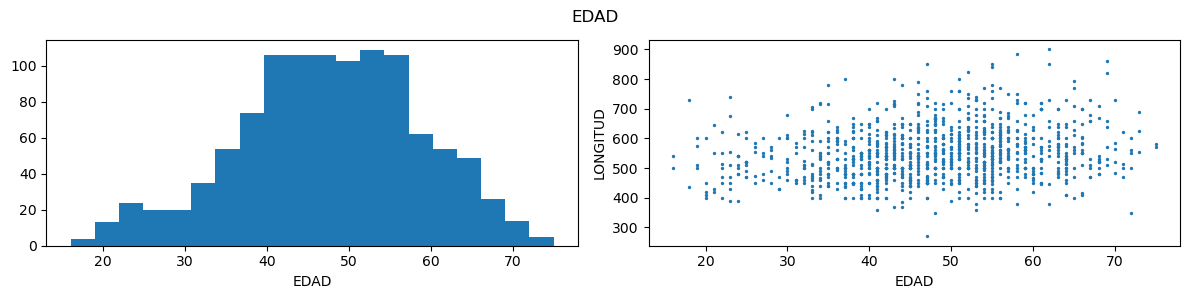

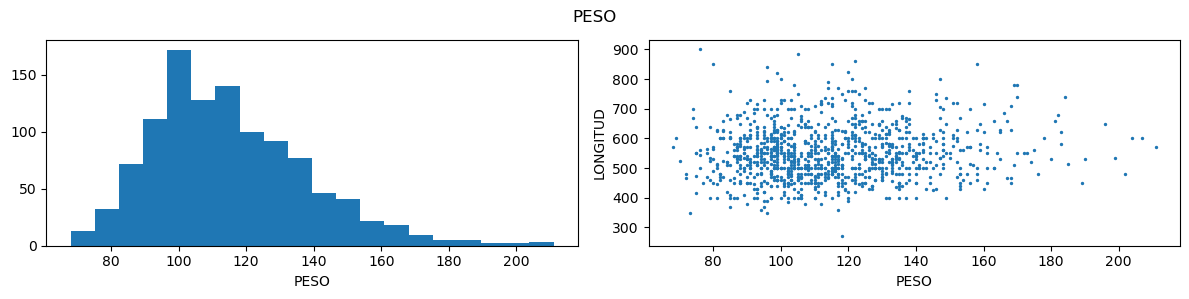

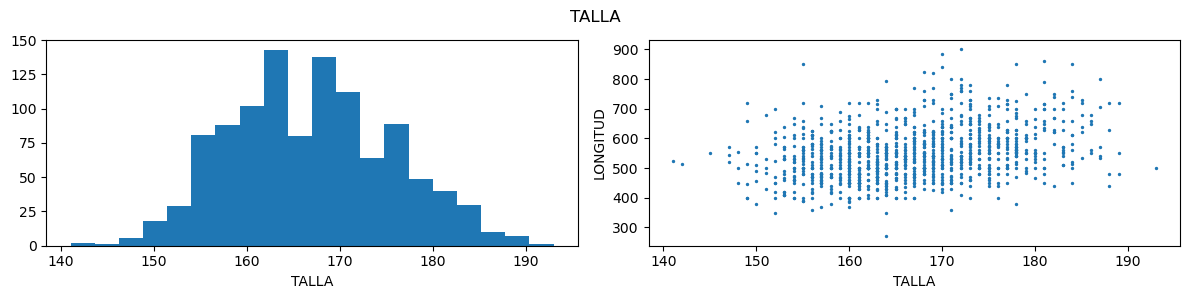

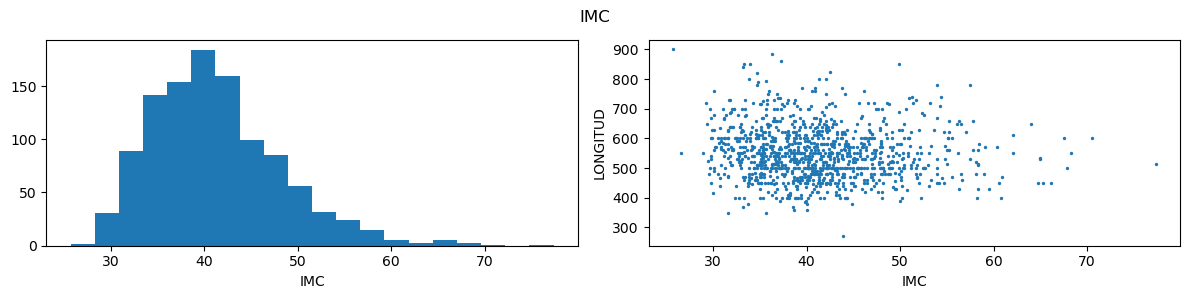

In [4]:
#data['IMClog']=np.log(data['IMC'])
num_features=['EDAD', 'PESO',	'TALLA', 'IMC']#,'IMClog']
target='LONGITUD'

# For each numeric variable...
for col in num_features:

    # Determine data to focus on
    x = data[col].copy()
    y = data[target].copy()

    # Generate interface for two graphs
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle(col)

    # Draw on the left the histogram with the distribution of the variable
    axs[0].hist(x, bins=20)
    axs[0].set_xlabel(col)

    # Draw the scatterplot on the right with the interaction between the variable of interest and the response variable
    axs[1].scatter(x, y, s=2)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(target)

    # show visualization
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

Se representa la distribucion de valores de la variable objetivo, lo que nos permite tener un criterio sobre lo que pueden ser longitudes extremas del intestino, muy cortas o muy largas. La distribucion es normal y ya se anticipa que para establecer los diferentes criterios de clasificación podremos utilizar los cuartiles de la distribución.

Text(0.5, 0, 'LONGITUD')

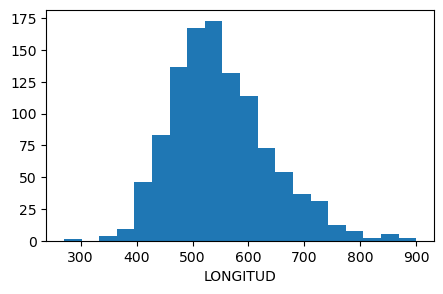

In [5]:
# Draw histogram with the distribution of the TARGET variable
plt.subplots(figsize=(5,3))
plt.hist(data['LONGITUD'], bins=20)
plt.xlabel('LONGITUD')

### Variables categoricas

Se analizan las distribuciones de valores de la variable categorica que va a utilizarse, el SEXO del paciente. Se descartan otras variables categóricas del data set puesto que son variables que informan de la operacion que ha tenido el paciente y no tienen caracter predictivo (HTA, DM, DL, SAOS, BARIÁTRICA PREVIA)

Se representan dos gráficas que muestran, por un lado la distribucion o histograma de cada uno de los valores de la variable (1 Hombre y 2 Mujer). Por otro se muestra el valor medio y desviacion típica de la variable objetivo (LONGITUD) para cada uno de los valores de la varible categírica.

Las graficas demuestran que hay mas mujeres que hombres en la muestra estando la muestra un poco desbalanceada (Hombres -> 500 y Mujeres-> 600) y que los sujetos de sexo masculino tiene una longitud de intestino medias superior a la de los de sexo femenino.

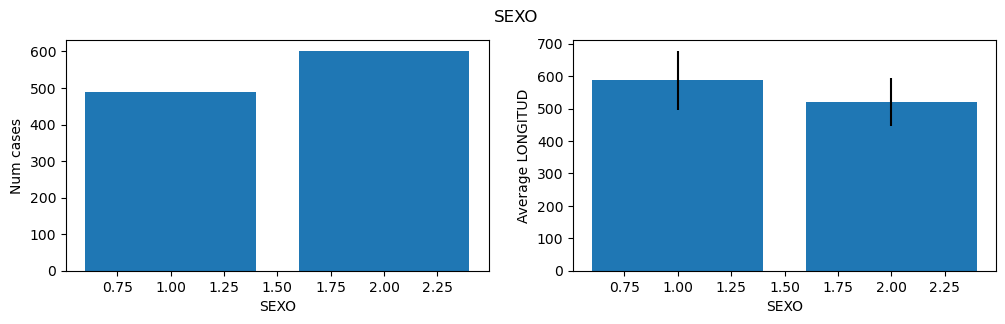

In [5]:
# Interaction variable definition
id='INICIALES'
cat_features= ['SEXO']#,'HTA', 'DM', 'DL', 'SAOS', 'BARIÁTRICA PREVIA']
target='LONGITUD'

# Iterate through each categorical variable...
for col in cat_features:

    # Determine data to focus on
    df_counts = data.groupby(col)[id].count()
    df_mean_target = data.groupby(col)[target].mean()
    df_std_target = data.groupby(col)[target].std()

    # Generate interface for two graphs
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    fig.suptitle(col)

    # Draw the bar chart with counts on the left
    x = df_counts.index.tolist()
    h = df_counts.values.tolist()
    axs[0].bar(x, h)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Num cases')

    # Draw on the right the bar chart with interaction between categories and average response
    x = df_mean_target.index.tolist()
    h = df_mean_target.values.tolist()
    err = df_std_target.values.tolist()
    axs[1].bar(x, h, yerr=err)
    axs[1].set_xlabel(col)
    axs[1].set_ylabel(f"Average {target}")

### Correlaciones

Finalmente se calculan las correlaciones entre las diferentes variables y con la variable objetivo, lo que nos da una indicación de la información redundante que contienen las variables de entrada del modelo y su poder predictivo con respecto de la variable objetivo.

Los valores obtenidos demuestran que los valores de correlacion son pequeños, salvo la correlacion entre TALLA, PESO e IMC que es logica debido a que se trata de una variable derivada de las anteriores. La correlación mas significativa es la del SEXO como se apreciaba en el analisis de la distribucion de valores de esta variable.

Una baja correlacion entre las variables de los datos y la variable objetivo anticipa que la calidad del modelo obtenido será limitada y que una posible mejora en el diseño sería la busqueda de nuevas variables de mayor significancia predictiva.

In [6]:
# A dictionary is created with the correlations between the independent variables and the objective variable
dict_corr = {}
for col in ['EDAD', 'PESO',	'TALLA','IMC','SEXO']:
    corr = data[col].corr(data[target])
    dict_corr[col] = corr

#sort and display dict
dict_corr = sorted(dict_corr.items(), key=lambda x: x[1], reverse=True)
dict_corr

[('TALLA', 0.32149714324338635),
 ('EDAD', 0.19432888831260808),
 ('PESO', 0.08935197397024912),
 ('IMC', -0.09323804833189253),
 ('SEXO', -0.37410181301480616)]

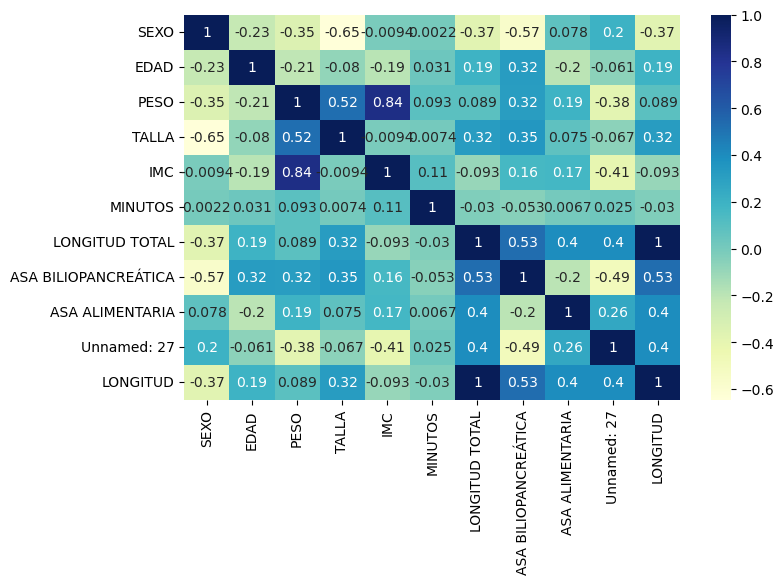

In [7]:
cols=['SEXO','EDAD', 'PESO','TALLA','IMC','MINUTOS','LONGITUD TOTAL','ASA BILIOPANCREÁTICA','ASA ALIMENTARIA','Unnamed: 27', 'LONGITUD']
corr_matrix = data[cols].corr()
#print(corr_matrix)
plt.subplots(figsize=(8,5))
sn.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [8]:
#https://eqibuana.medium.com/how-to-test-correlation-between-categorical-and-continuous-variables-in-data-science-95dca3704144
from scipy.stats import f_oneway

def ANOVA_Test(df, feature):
    category_groups = df.groupby(feature)[target].apply(list)
    return f_oneway(*category_groups)

p_vals = {}
for col in data[cat_features].columns:
    p_vals[col] = ANOVA_Test(data, col).statistic
#p_vals.pop(target)
sorted(p_vals.items(),key=lambda item: item[1],reverse=True)

[('SEXO', 177.04591677600072)]

## Fase de transformacion y preparacion de los datos

En esta fase los datos se preparan seleccionando las variables que van a ser las predictivas en el modelo. Tambien se escalan, puesto que las máquinas de vector soporte requieren el escalado de los datos para su correcto funcionamiento. Finalmente se establecen las etiquetas de clase en funcion del valor de variable objetivo (LONGITUD).

Estas clases permiten detectar longitudes extremas, que es el criterio de mayor utilidad para el caso médico de aplicación dado que la deteccion de estas longitudes extremas permite al cirujano identificar los casos de riesgo. Se establecerán diferentes tipos de clasificación al objeto de hacer más completo el diseño del algoritmo y más rica la seleccion final del mismo, con más posibilidades de decision optima.

Finalmente se prepara el conjunto de datos final para el diseño del modelo y se hace un análisis exploratorio de los datos finales.

### Seleccion de variables

Se descartan las siguientes variables por no estar correctamente informadas algunas de ellas o por que son variables relativas a los datos de la cirugia que no van a ser variables predictivas del modelo, puesto que no condicionan la longitud del intestino.

In [9]:
#seleccion de variables
#iniciales, municipio, tecnica -drop
#ciudad y fechas() fecha ingreso, fecha parte, fecha alta, hora inicio, hora final) habria que transformarlas, - ??
select_features=['EDAD', 'PESO','TALLA', 'IMC','SEXO']# 'IMC', 'HTA', 'DM', 'DL', 'SAOS' , 'BARIÁTRICA PREVIA', 'MINUTOS','ESTANCIA' ]
predict_feature= ['LONGITUD']
select_data=data[select_features].copy()

#categorical data - not ordinal
#sexo, dm, hta,'DM', 'DL', 'SAOS', 'BARIÁTRICA PREVIA' - onhotencoding -> OJO IMBALANCED, OJO SI SON ORDINALES
categorical_cols = ['SEXO']#,'HTA', 'DM', 'DL', 'SAOS', 'BARIÁTRICA PREVIA']
transformed_data = pd.get_dummies(select_data, columns = categorical_cols, dtype=int)

#numerical data
#minutos, edad, imc - numericas
transformed_columns=list(transformed_data.columns)
transformed_data.head()

,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2
0,37,97,172.0,32.787994,0,1
1,69,122,181.0,37.239401,1,0
2,55,96,170.0,33.217993,1,0
3,60,112,165.0,41.138659,0,1
4,53,82,154.0,34.575814,0,1


### Escalado de los rangos de valores de los datos

Los algoritmos de la máquina de vectores de soporte (SVM) son sensibles a el escalado de los datos, condicionandose el margen maximo aprendido por el algoritmo a las variables que presentan mayores rangos de variacion. Por ello se recomienda encarecidamente escalar los datos. En este caso se escala cada atributo del vector de entrada X a $[0,1]$, Esto se hará así para las variables numéricas aplicando la clase de scikit-learn `MinMaxScaler` y para la variable categórica de SEXO, se utilizará un codificador `dummy` con valores 0 y 1 tambien. El escalado se aplica a los datos de entrenamiento y con el transformador de entrenamiento, predecimos la transformacion en los datos de test. Esta es la forma correcta de aplicar los procesos de transformacion, dado que los datos de test no deben de entenar ninguno de los pasos de entrenamiento y en este caso condicionar el escalado.

En el siguiente código se presenta el `DataFrame`de datos originales no escalados y otro donde se han calculado todas las variables escaladas a $[0,1]$. Para cada uno de ellos se describen las características de los datos, para ver los valores numéricos de los estadísticos mas importantes de todas las variables del conjunto de datos.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# df0 -> DataFrames not scaled
# df1   -> DataFrame scaled but not LONGITUD  - scaler1

print('DISPLAY DF0----------------------------------')
X= transformed_data.copy()
y= data[predict_feature].copy()
df0= transformed_data.copy()
df0[predict_feature]= data[predict_feature].copy()
display(df0)
display(df0.describe().transpose())

print('DISPLAY DF1----------------------------------')
scaler1=MinMaxScaler()
X1 = scaler1.fit_transform(X)  #inverse_transform()
df1= pd.DataFrame(X1, columns=transformed_columns)
df1[predict_feature]=y
display(df1)
display(df1.describe().transpose())


DISPLAY DF0----------------------------------


,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2,LONGITUD
0,37,97,172.0,32.787994,0,1,590
1,69,122,181.0,37.239401,1,0,860
2,55,96,170.0,33.217993,1,0,840
3,60,112,165.0,41.138659,0,1,480
4,53,82,154.0,34.575814,0,1,460
...,...,...,...,...,...,...,...
1085,39,85,155.0,35.379813,0,1,400
1086,39,148,180.0,45.679012,1,0,540
1087,54,161,157.0,65.317051,0,1,450
1088,63,145,177.0,46.282997,1,0,600


,count,mean,std,min,25%,50%,75%,max
EDAD,1090.0,47.708257,11.380764,16.000000,41.000000,48.000000,55.000000,75.000000
PESO,1090.0,115.025688,23.018723,68.000000,98.000000,112.000000,129.000000,211.000000
TALLA,1090.0,166.743119,8.734849,141.000000,160.000000,166.000000,173.000000,193.000000
IMC,1090.0,41.264023,7.035458,25.689562,36.143848,40.346505,45.129549,77.365602
SEXO_1,1090.0,0.447706,0.497486,0.000000,0.000000,0.000000,1.000000,1.000000
SEXO_2,1090.0,0.552294,0.497486,0.000000,0.000000,1.000000,1.000000,1.000000
LONGITUD,1090.0,550.582569,88.519893,270.000000,490.000000,540.000000,600.000000,900.000000


DISPLAY DF1----------------------------------


,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2,LONGITUD
0,0.355932,0.202797,0.596154,0.137364,0.0,1.0,590
1,0.898305,0.377622,0.769231,0.223505,1.0,0.0,860
2,0.661017,0.195804,0.557692,0.145685,1.0,0.0,840
3,0.745763,0.307692,0.461538,0.298961,0.0,1.0,480
4,0.627119,0.097902,0.250000,0.171961,0.0,1.0,460
...,...,...,...,...,...,...,...
1085,0.389831,0.118881,0.269231,0.187519,0.0,1.0,400
1086,0.389831,0.559441,0.750000,0.386822,1.0,0.0,540
1087,0.644068,0.650350,0.307692,0.766845,0.0,1.0,450
1088,0.796610,0.538462,0.692308,0.398510,1.0,0.0,600


,count,mean,std,min,25%,50%,75%,max
EDAD,1090.0,0.537428,0.192894,0.0,0.423729,0.542373,0.661017,1.0
PESO,1090.0,0.328851,0.160970,0.0,0.209790,0.307692,0.426573,1.0
TALLA,1090.0,0.495060,0.167978,0.0,0.365385,0.480769,0.615385,1.0
IMC,1090.0,0.301386,0.136145,0.0,0.202304,0.283631,0.376190,1.0
SEXO_1,1090.0,0.447706,0.497486,0.0,0.000000,0.000000,1.000000,1.0
SEXO_2,1090.0,0.552294,0.497486,0.0,0.000000,1.000000,1.000000,1.0
LONGITUD,1090.0,550.582569,88.519893,270.0,490.000000,540.000000,600.000000,900.0


In [15]:
scaler1.n_samples_seen_ #check trained scaler is ok

1090

### Establecer etiquetas de categoríras para el clasificador

En este apartado se establecen las etiquetas de clase en funcion del valor de variable objetivo (LONGITUD).

Estas clases permiten detectar longitudes extremas, que es el criterio de mayor utilidad para el caso médico de aplicación dado que la deteccion de estas longitudes extremas permite al cirujano identificar los casos de riesgo. Se establecerán diferentes tipos de categorización al objeto de hacer más completo el diseño del algoritmo y más rica la seleccion final del mismo, con más posibilidades de decision optima.

El proceso de clasificación se alinea con los objetivos médicos que se esperan en el sistema predictivo. Lo importante es que el modelo sea capaz de identificar longitudes del intestino extremas, atípicamente cortas o largas, puesto que estas son las que presentan mayor riesgo en la fase quirurgica. Si el modelo tiene la capacidad de discernirlas, el modelo podra aportar una capacidad preventiva de alertar al médico de los riesgos de la operacion de una forma previa y util para el cirujano, que en base a lo que el modelo indica puede decidir realizar una medida previa del intestino para evitar esos riesgos.

Los tres tipos de categorización que se van a establecer son los siguientes:

- Categorización normal (`labels_step_normal`): tomaremos el histograma de la distribucion de longitudes del intestino en la muestra de datos y determinaremos una separacion de las clases en base a los cuartiles de esta distribución. Etiquetaremos de la siguiente forma: Clase 0 longitudes cortas (aquellas menores de 490 cm, el primer cuartil), Clase 1 longitudes medias (aquellas cuyos valores estan entre el primer y tercer cuartil) y Clase 2 logitudes largas (aquellas mayores de 600 cm, el tercer cuartil)

- Categorización extrema (`labels_step_tail`): tomaremos el histograma de la distribucion de longitudes del intestino en la muestra de datos y determinaremos una separacion de las clases en base a las colas de esta distribución. Etiquetaremos de la siguiente forma: Clase 0 longitudes cortas (aquellas menores de 475 cm), Clase 2 logitudes largas (aquellas mayores de 650 cm) y Clase 1 longitudes medias, el resto.

- Categorización por agrupacion natural de los datos o clustering (`labels_kmeans`): en este caso, no se propone ninguna longitud determinada como corta o larga, sino que se realiza un proceso de clustering para aprender la distribucion de los datos en el espacio de todas sus variables. Esto nos permite descubrir si existen clusteres de diferentes tipos de pacientes y tomar esas agrupaciones como la categoría de clasificacion para el algoritmo. El proceso de clustering demuestra que efectivamente pueden distinguirse tres grupos de pacientes y se etiquetan cada grupo con una clase diferente: Clase 0 longitudes cortas y pacientes con menos peso, mas jovenes y predominantemente mujeres, Clase 1 longitudes medias con pacientes de edad media e indistintamente mujeres u hombres, Clase 2 longitudes mayores, pacientes de mayor edad, peso y predominantemente hombres

Los tres tipos de clasificación se recogen en tres variables objetivo categóricas diferenciadas y que corresponden a las variables cualitativas  `labels_step_normal`, `labels_step_tail` y `labels_kmeans`.

Finalmente se construye un `DataFrame` llamado `total_df` que contiene las variables de entrada sin escalar, las variables de entrada escaladas, la variable objetivo LONGITUD y las variables cualitativas de los tres tipos de categorizaciones que estamos contemplando para el analisis.


#### Categorización por agrupacion natural de los datos o clustering

En este apartado se aplica el metodo del codo y la métrica del coeficiente de silueta para buscar el numero de clústeres idoneo para la agrupacion de los datos.

El codigo realiza la evaluacion del coste de entrenamiento y el coeficiente de silueta para un numero variable de posibles clústeres (`min_clusters`=3, `max_clusters`=10) demostrando que la metrica de agrupacion es buena (superior a 0.5) y el coste disminuye con el numero de clusters.

In [11]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score
import time

def form_clusters(x,k):
    """Build clusters"""
    # k=required number of clusters
    # n_jobs = 1 # 1 no parallel implementation, -1 all cores used
    model = KMeans(init='k-means++', n_clusters=k, n_init=10, verbose=0, random_state=42)


    t0 = time.time()
    model.fit(x)
    t_model = time.time() - t0

    labels = model.labels_
    inertia = model.inertia_
    centroids = model.cluster_centers_ #np.sort(model.cluster_centers_)

    #Cacluate the silhouette	score
    sh_score = silhouette_score(x,labels)
    print('%i clusers - %f seconds - %f silouhette coef - %f cost' % ( k , t_model, sh_score, inertia))
    return sh_score, inertia, centroids

2 clusers - 0.396885 seconds - 0.559590 silouhette coef - 3190816.335944 cost
3 clusers - 0.383918 seconds - 0.546146 silouhette coef - 1615730.380023 cost
4 clusers - 0.385912 seconds - 0.536593 silouhette coef - 992330.208058 cost
5 clusers - 0.390403 seconds - 0.538985 silouhette coef - 680755.072130 cost
6 clusers - 0.396914 seconds - 0.538875 silouhette coef - 502835.995132 cost
7 clusers - 0.389425 seconds - 0.536343 silouhette coef - 375969.425682 cost
8 clusers - 0.401936 seconds - 0.552425 silouhette coef - 272242.100499 cost
9 clusers - 0.411934 seconds - 0.557868 silouhette coef - 217849.399195 cost


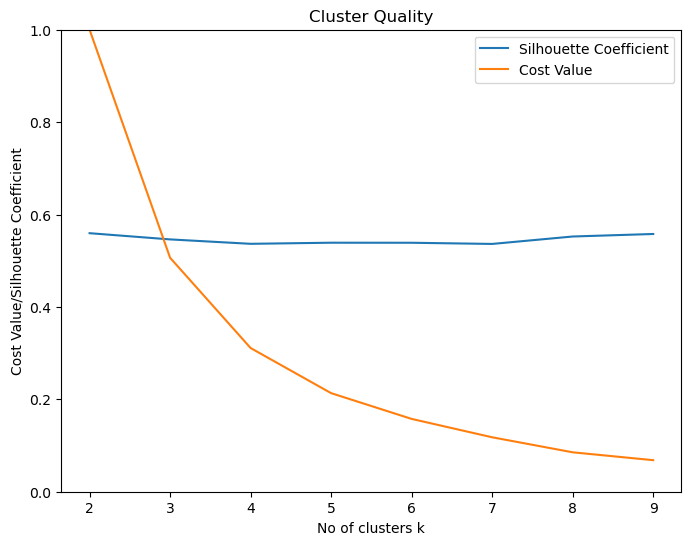

In [13]:
#EVALUATING THE ALGORITHM
#########################

#1) settings
model_used='k_means'
#model_used='mbk_means'
sh_scores = []
cost_scores = []
dict_centroids = {}
min_clusters=2
max_clusters=10
batch_size = 1000 #size of sample points to compute minibatch

#2) loop for different number of clustters k
for k in range(min_clusters,max_clusters):
    sh_score, cost, centers = form_clusters(df1[transformed_columns+['LONGITUD']],k) #'PESO','TALLA','IMC',[['EDAD','TALLA','SEXO_1','SEXO_2']]
    sh_scores.append(sh_score)
    cost_scores.append(cost)

#PLOT ELBOW AND SILOUHETTE
no_clusters = [i for i in range(min_clusters,max_clusters)]
cost_minmax = [e/max(cost_scores) for e in cost_scores] #scale cost values to max one -> % cost

plt.figure(figsize=(8,6))
plt.plot(no_clusters,sh_scores,label="Silhouette Coefficient")
plt.plot(no_clusters,cost_minmax,label="Cost Value")
plt.ylim([0.0,1.0])
plt.title("Cluster Quality")
plt.xlabel("No of clusters k")
plt.ylabel("Cost Value/Silhouette Coefficient")
plt.legend()

Se decide que por el sentido de aplicación que se va a dar a los datos, no es conveniente un numero elevado de clústeres y que el número optimo debería de ser de tres grupos para poder diferenciar las longitudes extremas (cortas o largas) y medias.

Se realiza la agrupacion y cada muestra queda marcada en uno de los clusteres.

Finalmente se contabilizan el numero de muestras de datos que caen en cada agrupacion, o cluster, y se muestra el valor de los centriodes de los clusteres, dandonos una idea del paciente medio o protipo de cada cluster. Como nuestros datos están escalados debemos de revertir esa transformación para obtener los valores de las variables del centroide no escaladas y entender de forma correcta los valores de esos pacientes prototipo de cada clase

In [14]:
df=df1.copy()
n=0

def centroids2excel(k,centers, filename):
    dict_cent={}
    n_centroid = 0
    for c in centers:
        label_center = 'k'+str(k)+'_c'+str(n_centroid)
        array_center = [e for e in c]
        dict_cent[label_center] = array_center
        n_centroid +=1

    #STORE CENTROIDS IN excel FILE
    #print('dict_centroids->',dict_cent)
    df_cent=pd.DataFrame.from_dict(dict_cent,orient='index', columns=df.columns)
    display(df_cent)
    #print('df.columns',df.columns)
    df_cent.to_excel(filename)

#for k in range(3,4):
k=3
model = KMeans(init='k-means++', n_clusters=k, n_init=10, verbose=0, random_state=14)
model.fit(df)

# Centroids to excel
centroids = model.cluster_centers_
centroids2excel(k, centroids,'centroids_result_'+str(n)+'_'+str(k)+'.xlsx')

# Data and centroid to excel
labels = model.labels_
df_result = df.copy()
df_result['labels'] = labels

df_result.to_excel('patients_result_'+str(n)+'_'+str(k)+'.xlsx')
print(str(k)+'----------------------------------------------')
display(df_result.groupby(['labels'])['labels'].count())

,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2,LONGITUD
k3_c0,0.495610,0.317567,0.442864,0.317168,0.257831,0.742169,466.783133
k3_c1,0.549540,0.331278,0.507554,0.296432,0.496994,0.503006,568.106212
k3_c2,0.601695,0.348578,0.582714,0.278220,0.755682,0.244318,698.494318


3----------------------------------------------


labels
0    415
1    499
2    176
Name: labels, dtype: int64

Se transforman los centroides de los datos para obtener los valores de las variables iniciales que caracterizan a los pacientes prototipo de cada agrupacion o cluster.

Como vemos, el proceso de clustering demuestra que efectivamente pueden distinguirse tres grupos de pacientes y se etiquetan cada grupo con una clase diferente:

- Clase 0 (centroide `k2_c0`) longitudes cortas y pacientes con menos peso, mas jovenes y predominantemente mujeres
- Clase 1 (centroide `k2_c1`) longitudes medias con pacientes de edad media e indistintamente mujeres u hombres
- Clase 2 (centroide `k2_c2`) longitudes mayores, pacientes de mayor edad, peso y predominantemente hombres

In [ ]:
#OPTION TRANSFORM
##################################

#display(centroids)
centroids_transformed_ = scaler1.inverse_transform(centroids[:,:-1])
centroids_allfeatures=np.hstack((centroids_transformed_,centroids[:,-1:]))
centroids2excel(2, centroids_allfeatures,'centroids_escalados_result'+str(n)+'_'+str(k)+'.xlsx')

## copiar datos originales sin escalar y pegar etiquetas -> patients_escalados_result.xlsx

,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2,LONGITUD
k2_c0,45.240964,113.412048,164.028916,42.079567,0.257831,0.742169,466.783133
k2_c1,48.422846,115.372745,167.392786,41.008005,0.496994,0.503006,568.106212
k2_c2,51.500000,117.846591,171.301136,40.066874,0.755682,0.244318,698.494318


#### Categorización por division de longitudes normal y extrema

En este apartado creamos el `DataFrame` final de los datos que vamos a utilizar para diseñar el modelo predictivo.

Para ello se establecen las categorizaciones de longitudes normales y extremas, creando tres variables de categorízaciones diferentes con tres nuevas variables cualitativas  `labels_step_normal`, `labels_step_tail` y `labels_kmeans` y se construye el `DataFrame` llamado `total_df` que contiene las variables de entrada sin escalar, las variables de entrada escaladas, la variable objetivo `LONGITUD` y las variables cualitativas de los tres tipos de categorizaciones que estamos contemplando para el analisis.

In [16]:
def func_step_normal(x):
  if x<490:
    return 0
  elif x>600:
    return 2
  else:
    return 1

def func_step_tail(x):
  if x<475:
    return 0
  elif x>650:
    return 2
  else:
    return 1

df1_transformed_ = scaler1.inverse_transform(df_result.iloc[:,:-2])
display(pd.DataFrame(df1_transformed_).head(5))
df1_transformed_allfeatures = np.hstack((df1_transformed_,df_result.iloc[:,-2:]))
display(pd.DataFrame(df1_transformed_allfeatures).head(5))
data_train_scaled_clustered = np.hstack((df1_transformed_,df_result))
total_columns=['EDAD', 'PESO', 'TALLA', 'IMC', 'SEXO_1', 'SEXO_2']+['EDAD_scaled', 'PESO_scaled', 'TALLA_scaled', 'IMC_scaled', 'SEXO_1_scaled', 'SEXO_2_scaled']+['LONGITUD','labels_kmeans']
total_df=pd.DataFrame(data_train_scaled_clustered,columns=total_columns)
total_df['labels_step_normal']= total_df.apply(lambda row: func_step_normal(row['LONGITUD']), axis=1)
total_df['labels_step_tail']= total_df.apply(lambda row: func_step_tail(row['LONGITUD']), axis=1)
display(total_df.head(5))
total_df.to_excel('data_train_scaled_clustered_steps.xlsx')

,0,1,2,3,4,5
0,37.0,97.0,172.0,32.787994,0.0,1.0
1,69.0,122.0,181.0,37.239401,1.0,0.0
2,55.0,96.0,170.0,33.217993,1.0,0.0
3,60.0,112.0,165.0,41.138659,0.0,1.0
4,53.0,82.0,154.0,34.575814,0.0,1.0


,0,1,2,3,4,5,6,7
0,37.0,97.0,172.0,32.787994,0.0,1.0,590.0,1.0
1,69.0,122.0,181.0,37.239401,1.0,0.0,860.0,2.0
2,55.0,96.0,170.0,33.217993,1.0,0.0,840.0,2.0
3,60.0,112.0,165.0,41.138659,0.0,1.0,480.0,0.0
4,53.0,82.0,154.0,34.575814,0.0,1.0,460.0,0.0


,EDAD,PESO,TALLA,IMC,SEXO_1,SEXO_2,EDAD_scaled,PESO_scaled,TALLA_scaled,IMC_scaled,SEXO_1_scaled,SEXO_2_scaled,LONGITUD,labels_kmeans,labels_step_normal,labels_step_tail
0,37.0,97.0,172.0,32.787994,0.0,1.0,0.355932,0.202797,0.596154,0.137364,0.0,1.0,590.0,1.0,1,1
1,69.0,122.0,181.0,37.239401,1.0,0.0,0.898305,0.377622,0.769231,0.223505,1.0,0.0,860.0,2.0,2,2
2,55.0,96.0,170.0,33.217993,1.0,0.0,0.661017,0.195804,0.557692,0.145685,1.0,0.0,840.0,2.0,2,2
3,60.0,112.0,165.0,41.138659,0.0,1.0,0.745763,0.307692,0.461538,0.298961,0.0,1.0,480.0,0.0,0,1
4,53.0,82.0,154.0,34.575814,0.0,1.0,0.627119,0.097902,0.250000,0.171961,0.0,1.0,460.0,0.0,0,0


In [22]:
print('CLASIFICACION NORMAL muestras en cada una de las clases----------------------------------------------')
display(total_df.groupby(['labels_step_normal'])['labels_step_normal'].count())

print('CLASIFICACION EXTREMA muestras en cada una de las clases----------------------------------------------')
display(total_df.groupby(['labels_step_tail'])['labels_step_tail'].count())

CLASIFICACION NORMAL muestras en cada una de las clases----------------------------------------------


labels_step_normal
0    264
1    575
2    251
Name: labels_step_normal, dtype: int64

CLASIFICACION EXTREMA muestras en cada una de las clases----------------------------------------------


labels_step_tail
0    207
1    751
2    132
Name: labels_step_tail, dtype: int64

### Análisis Explotarorio de los datos

#### not scaled

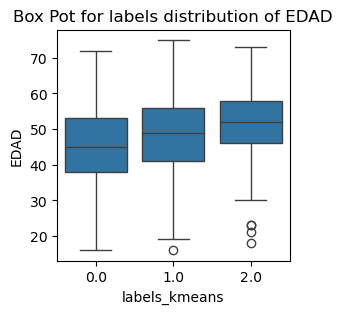

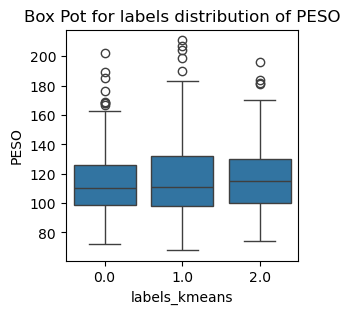

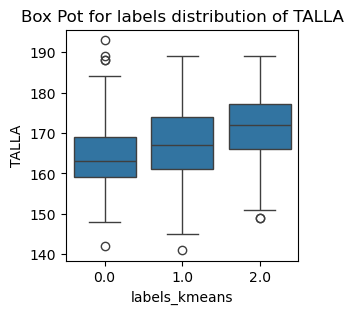

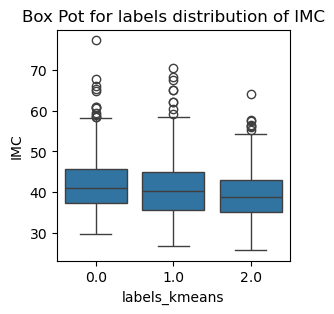

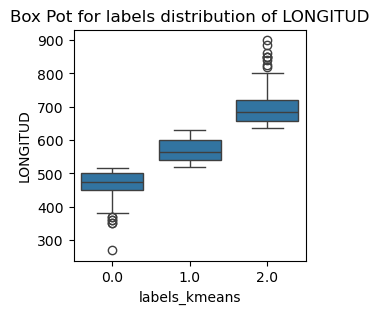

In [17]:
#data['IMClog']=np.log(data['IMC'])
num_features=select_features[:-1] #sin 'SEXO', ni 'SEXO_1', ni	'SEXO_2',
target='LONGITUD'

# For each numeric variable...
for col in num_features+[target]:
  fig,ax = plt.subplots(figsize=(3,3))
  sn.boxplot(total_df[['labels_kmeans',col]],x='labels_kmeans',y=col,ax=ax)
  ax.set(title="Box Pot for labels distribution of "+col)

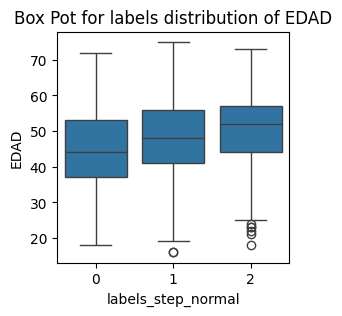

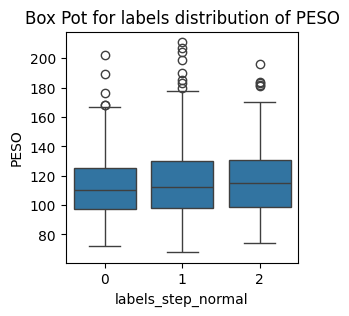

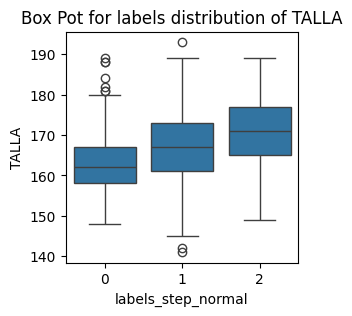

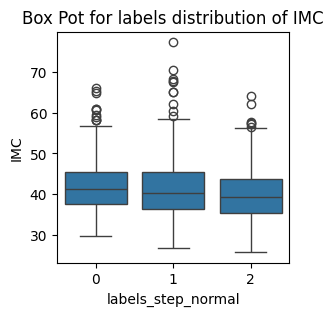

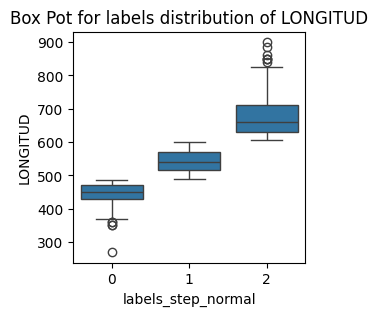

In [ ]:
#data['IMClog']=np.log(data['IMC'])
num_features=select_features[:-1] #sin 'SEXO', ni 'SEXO_1', ni	'SEXO_2',
target='LONGITUD'

# For each numeric variable...
for col in num_features+[target]:
  fig,ax = plt.subplots(figsize=(3,3))
  sn.boxplot(total_df[['labels_step_normal',col]],x='labels_step_normal',y=col,ax=ax)
  ax.set(title="Box Pot for labels distribution of "+col)

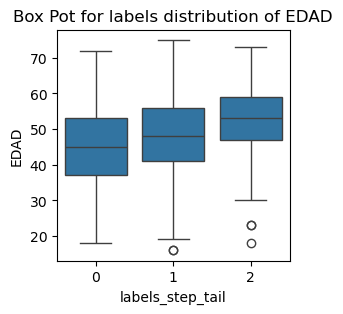

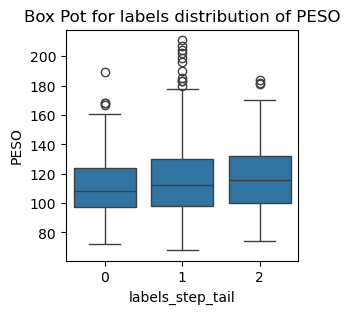

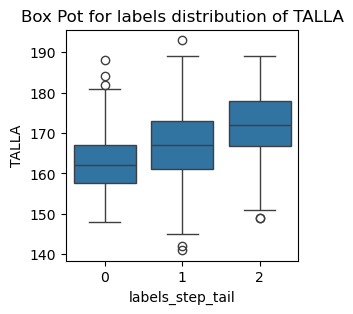

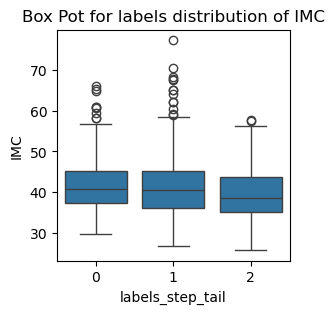

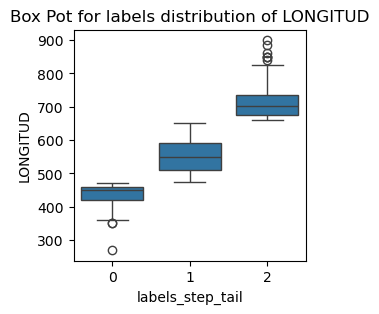

In [18]:
#data['IMClog']=np.log(data['IMC'])
num_features=select_features[:-1] #sin 'SEXO', ni 'SEXO_1', ni	'SEXO_2',
target='LONGITUD'

# For each numeric variable...
for col in num_features+[target]:
  fig,ax = plt.subplots(figsize=(3,3))
  sn.boxplot(total_df[['labels_step_tail',col]],x='labels_step_tail',y=col,ax=ax)
  ax.set(title="Box Pot for labels distribution of "+col)

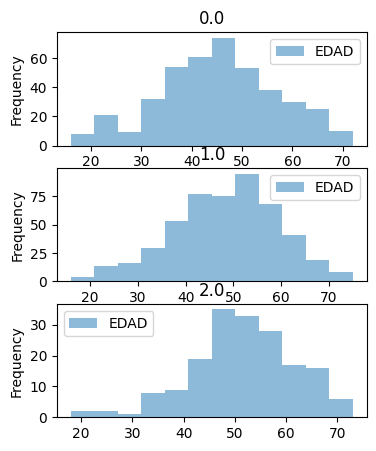

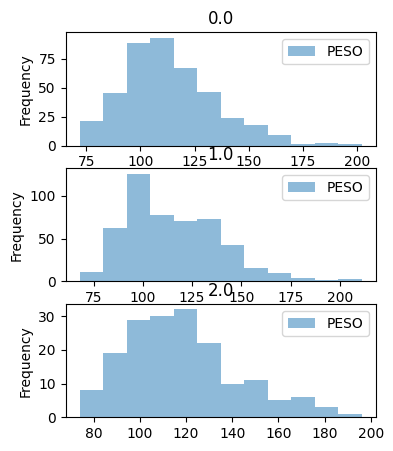

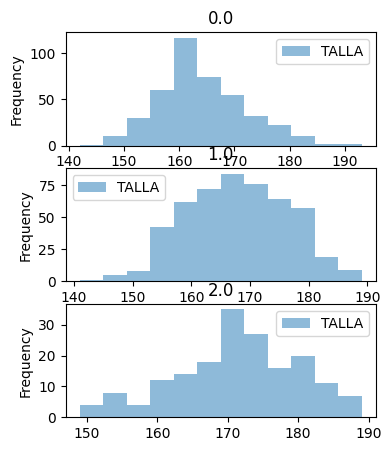

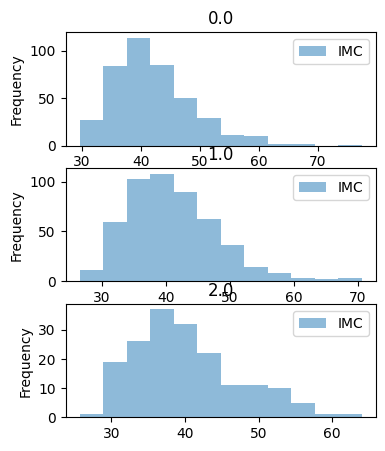

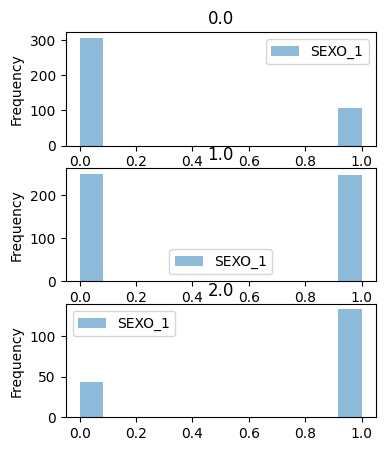

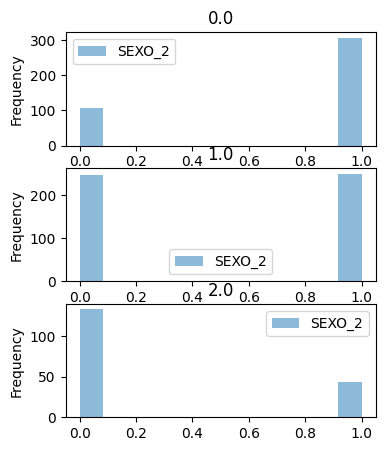

In [ ]:
for col in num_features+['SEXO_1', 'SEXO_2']:
  total_df[[col,'labels_kmeans']].plot.hist(bins=12, alpha=0.5, by='labels_kmeans',legend=True, figsize=(4,5))

#### scaled

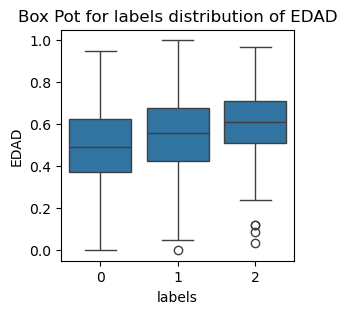

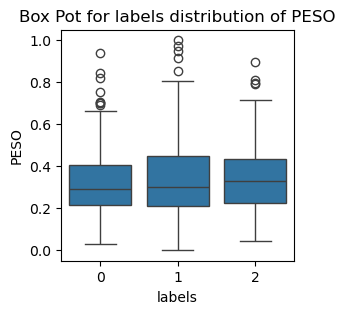

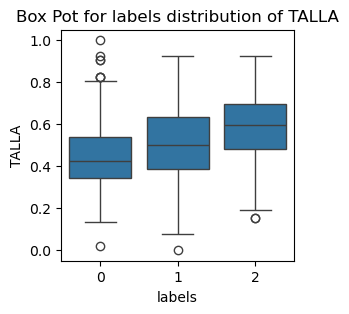

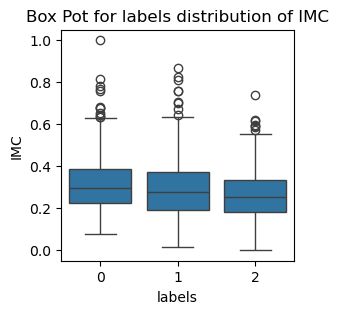

In [19]:
#data['IMClog']=np.log(data['IMC'])
num_features=select_features[:-1] #sin 'SEXO', ni 'SEXO_1', ni	'SEXO_2',
target='LONGITUD'

# For each numeric variable...
for col in num_features:
  fig,ax = plt.subplots(figsize=(3,3))
  sn.boxplot(df_result[['labels',col]],x="labels",y=col,ax=ax)
  ax.set(title="Box Pot for labels distribution of "+col)

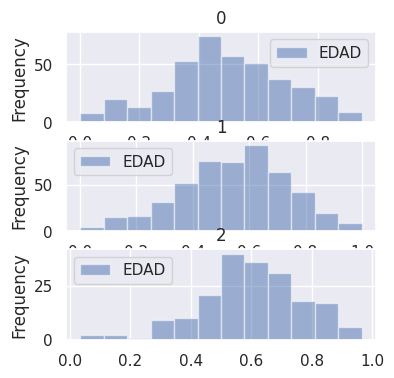

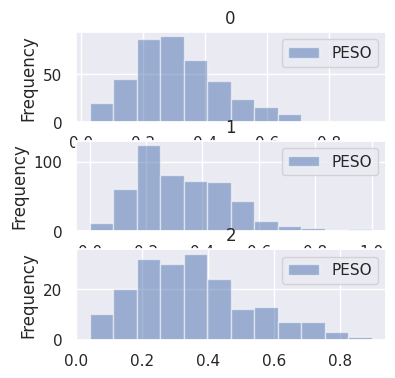

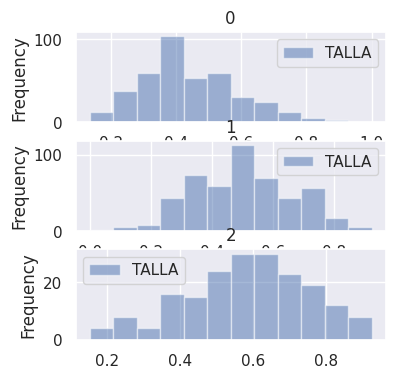

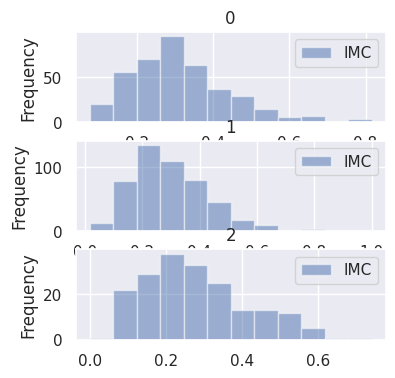

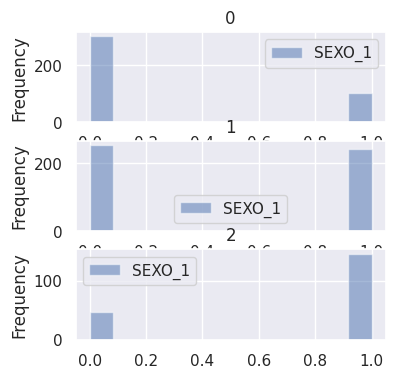

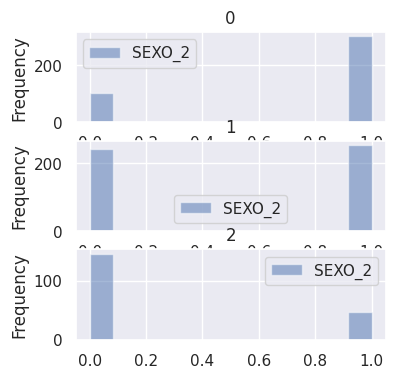

In [ ]:
for col in num_features+['SEXO_1', 'SEXO_2']:
  df_result[[col,'labels']].plot.hist(bins=12, alpha=0.5, by='labels',legend=True, figsize=(4,4))

## Fase de modelizacion y diseño del sistema predictivo

En esta fase se selecciona el algoritmo de clasificacion de Máquinas de Vector Soporte (SVC) para el diseño del sistema predictivo, para que sirva de base comparativa sobre el mismo tipo de algoritmo cuántico que se desarrollará posteriormente.

Como el conjunto de datos no esta balanceado de forma equilibrada entre las clases (ie. no hay el mismo numero de muestras de cada clase), se requiere enriquecer los datos o hacer un entrenamiento no balanceado en SVC.

Se realiza un ajuste fino de los hiperparámetros de diferentes modelos con los datos de entrada, mediante un mecanismo de búsqueda exhaustiva (GridSearch) en el espacio de hiperparámetros, del cual se obtienen modelos optimos para los diferentes casos de clasificacion. Se presentan y analizan las mejores metricas de clasificación ontenidas en cada caso.

En esta seccion, se presentará una descripcion de los hyperparámetros de ajuste del clasificador, se realizará un enriquecimiento de los datos para construir un conjunto de muestras balanceado entre las diferentes clases y se realizarán ajustes finos de los modelos en diferentes escenarios, obteniendo el mejor modelo en cada caso. Estos escenarios de diseño son los siguientes:

- Se enriquece el conjunto de datos de entrada para tener clases balanceadas o no se enriquece
- Se predice la clasificacion de las eqiquetas de cada una de las tres categorizaciones que hemos definido (variables objetivo `labels_step_normal` o `labels_step_tail` o `labels_kmeans`. )

### Clasificador de Máquinas de Vector Soporte

Previo a realizar el diseño del algoritmo, estudiamos en detalle la clase [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) para entender las capacidades que se tienen en el proceso.

Esta clase nos permite la utilizacion de tipos de clusteres ya predefinidos:

- linear: $<x,x'>$

- polynomial: $(\gamma<x,x'>+r)^d$ donde d es el parametro `degree` y r es `coef0`

- gausiano o rbf: $exp(-\gamma||x,x'||^2)^d$ donde $\gamma$ es el parametro `gamma` que debe ser mayor que 0

- sigmoid: $tanh(\gamma<x,x'>+r)^d$ donde r es el parametro `coef0`

Un objeto clasificador lleva asociado un tipo de kernel y además, una serie de hyperparámetros, que pasamos a describir a continuación:

- Parámetro `C` de penalizacion de las muestras ruidosas que nos permite hacer un ajuste mas general del margen de separacion de las clases. A valores más altos, se permiten menos errores de clasificación y el tiempo de entrenamiento aumenta
- Parámetro `$\gamma$`: para el kernel gausiano o rbf. Valores más elevados intentan ajustar el conjunto de datos de entrenamiento
- Parámetro `degrees`: para el kernel polinomial, es el grado del polinomio de transformacion del kernel. Valores más elevados tendran mayor coste de tiempo de entrenamiento
- Parámetro `coef0`: para el kernel polinomico es la constante de la transformacion polinómica

Además, en el caso de tener un conjunto de datos desbalanceado, con diferente nuemero de muestras en las distintas clases, el clasificador se puede entrenar dando un peso diferente a las diferentes clases, de manera que no requiere necesariamente un enriquecimiento de los datos de entrada. Este posibilidad se controla con siguiente parámetro:

- Parámetro `class_weight_dict`: si no se informa, se supone que todas las clases deben tener un peso uno y es necesario enriquecer los datos previo al entrenamiento. El modo "balanced" utiliza los valores de y para ajustar automáticamente los pesos inversamente proporcionales a las frecuencias de clase en los datos de entrada como n_samples / (n_classes * np.bincount(y)). Tambien se puede especificar un valor de peso determinado para cada clase (p.ejemp. $\{0:2, 1:1, 2:4\}$, donde la clase 0 pesa doble que la 1 y la dos doble que la 0)

Se puede además especificar un tamaño de capacidad de memoria cache para realizar los calculos y un estado random inicial fijo para que estos sean reproducibles en cada ejecucion.

### Enriquecimiento de los datos (Data Interpolation)



En este apartado se cargan y utilizan las librerías `smote` que nos permiten contruir conjuntos de datos con clases balanceadas a partir de conjuntos de datos no balanceados.

En el codigo siguiente se crean tres `DataFrames`que contienen datos enriquecidos para las tres categorizaciones que se han definido como escenarios diferentes de entrenamiento.

In [23]:
#instalacion de las librerías
!pip install -U imbalanced-learn

In [24]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SMOTENC

sm = SMOTE(random_state=42)#creamos el estimador con random_state=42
#sm = BorderlineSMOTE(random_state=42)
#sm = SMOTENC(categorical_features=[0, 1],random_state=42)


#Fitting and sampling can also be done in one step with .fit_sample
#data_resampled, targets_resampled = <estimator>.fit_sample(data, targets)
X_res_kmeans, Y_res_kmeans = sm.fit_resample(total_df[transformed_columns].copy(), total_df['labels_kmeans'].copy())
X_res_step_normal, Y_res_step_normal = sm.fit_resample(total_df[transformed_columns].copy(), total_df['labels_step_normal'].copy())
X_res_step_tail, Y_res_step_tail = sm.fit_resample(total_df[transformed_columns].copy(), total_df['labels_step_tail'].copy())

Puede observarse el conteo de muestras en cada clase antes y despues del enriquecimiento. Para cada escenario de clasificacion se descomenta el `DataFrame`con el que se quiera trabajar y se comentan los demas.

In [26]:
#SELECT A CLASIFICATION METHOD
#CLUSTERED
df_enriched=X_res_kmeans.copy()
df_enriched['labels']=Y_res_kmeans.copy().astype(int)
display(df_enriched.groupby(['labels'])['labels'].count())

#df_enriched=X_res_step_normal.copy()
#df_enriched['labels']=Y_res_step_normal.copy().astype(int)
#display(df_enriched.groupby(['labels'])['labels'].count())

#df_enriched=X_res_step_tail.copy()
#df_enriched['labels']=Y_res_step_tail.copy().astype(int)
#display(df_enriched.groupby(['labels'])['labels'].count())

labels
0    499
1    499
2    499
Name: labels, dtype: int64

### Ajuste fino de SVC

Se procede a un barrido exhaustivo en el espacio de hyperparámetros del algoritmo para evaluar las metricas de resultado en cada uno de los escenarios contemplados.

El codigo que se muestra a continuacion, realiza un proceso de busqueda exhaustiva del mejor modelo sobre un posible conjunto de valores de hyperparámetros. Este codigo es equivalente a la utilizacion de una clase `GridSearch` de scikit-learn, pero se implementa a bajo nivel para controlar las ejecuciones de cada modelo evaluado y poder ver la evolucion de las metricas de evaluacion durante el proceso de busqueda, en lugar de optener simplemente el mejor modelo que devuelve esta clase de scikit-learn.

Para ejecutar el proceso de ajuste fino en cada uno de los escenarios, se elige el conjunto de datos de entrada adecuado en cada caso comentando o descomentando los `DataFrame`que debe de utilizarse en el codigo. Los escenarios en entrenamiento con datos balanceados (datos enriquecidos) o no y cada una de las categorizaciones definidas para clasificacion.

Adicionalmente se realizó una busqueda de ajuste manual del diccionario de pesos de las clases en datos no balanceados, pero este escenario no logró dar buenos resultados.Por lo que en el escenario de datos no balanceados los pesos se asignan de forma automática con la opcion `balanced` del parametro de pesos de clases.

In [27]:
#X= df_result[['EDAD', 'IMC', 'SEXO_1', 'SEXO_2']].copy()
#y= df_result['labels'].copy()

#DATOS NO BALANCEADOS
X= total_df[transformed_columns].copy()
#y= total_df['labels_kmeans'].copy()
#y= total_df['labels_step_normal'].copy()
y= total_df['labels_step_tail'].copy()

#DATOS INTERPOLADOS
#X= df_enriched[transformed_columns].copy()
#y= df_enriched['labels'].copy()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23) # 90% training and 10% test

Para la busqueda y diseño del mejor modelo en cada escenario, nos guiaremos por una métrica de la matrix de confusion, que puede obtenerse al evaluar las predicciones del modelo con respecto del conjunto de datos de test. Tras diferentes pruebas se decidió tomar como guía la métrica `F1-score` de la clase 2.

En el siguiente codigo vemos como obtener el valor de los resultados de la funcion `metrics.classification_report()`

In [28]:
#sacar las metricas para rastrear en el grid search
y_pred= SVC(C=10, kernel='sigmoid', cache_size=1000, class_weight= 'balanced', random_state = 26).fit(X_train,y_train).predict(X_test)
m=metrics.classification_report(y_test,y_pred)
print('f1-score accuracy', 100*float(m.split('\n')[6].split('      ')[4]),'---------------------------')
print(m)
f1_c0=100*float(m.split('\n')[2].split('      ')[4]) #f1-score accuracy class 0
f1_c1=100*float(m.split('\n')[3].split('      ')[4]) #f1-score accuracy class 1
f1_c2=100*float(m.split('\n')[4].split('      ')[4]) #f1-score accuracy class 2
f1_all=100*float(m.split('\n')[6].split('      ')[4]) #f1-score accuracy all classes
not_cero= (f1_c0 !=0) and (f1_c1 !=0) and (f1_c2 !=0)
print(not_cero)

f1-score accuracy 43.0 ---------------------------
              precision    recall  f1-score   support

           0       0.27      0.80      0.41        20
           1       0.74      0.35      0.47        75
           2       0.33      0.36      0.34        14

    accuracy                           0.43       109
   macro avg       0.45      0.50      0.41       109
weighted avg       0.60      0.43      0.44       109

True


El codigo utilizado para realizar el ajuste fino es el siguiente:

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid'] #kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane
#cs = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.1, 1.5, 2, 5, 10, 100, 1000] #C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.
cs = [0.001, 0.01, 0.1, 1, 10, 100]
#Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.
#Meanwhile, larger C values will take more time to train

#parameter specific to kernels
#gammas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 1.1, 1.5, 2, 5, 10, 100]
gammas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] #gamma is a parameter for non linear hyperplanes ‘rbf’. The higher the gamma value it tries to exactly fit the training data set
#degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #degree is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.
degrees = [0, 1, 2, 3, 4]
#coef0s = [0, 0.001, 0.01, 0.1, 1, 5]
coef0s = [0, 0.1, 1, 5] #float, default=0.0 Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’. controls how much the model is influenced by high degree polynomials versus low-degree polynomials
#coefs range https://stackoverflow.com/questions/21390570/scikit-learn-svc-coef0-parameter-range
class_weight_dict='balanced' #in the fit method. It’s a dictionary of the form {class_label : value}

X_eval= X_test.copy()
y_eval= y_test.copy()

maxmean = 0
for kernel in kernels:
  for c in cs:
    if kernel=='rbf':
      for gamma in gammas:
          y_pred= SVC(C=c, kernel=kernel, cache_size=1000, gamma=gamma,
                      class_weight= class_weight_dict,
                      random_state = 26).fit(X_train,y_train).predict(X_eval)

          #confussion matrix metrics
          m=metrics.classification_report(y_eval,y_pred)
          f1_c0=100*float(m.split('\n')[2].split('      ')[4]) #f1-score accuracy class 0
          f1_c1=100*float(m.split('\n')[3].split('      ')[4]) #f1-score accuracy class 1
          f1_c2=100*float(m.split('\n')[4].split('      ')[4]) #f1-score accuracy class 2
          f1_all=100*float(m.split('\n')[6].split('      ')[4]) #f1-score accuracy all classes
          not_cero= (f1_c0 !=0) and (f1_c1 !=0) and (f1_c2 !=0)

          print('kernel '+str(kernel)+'-gamma '+str(gamma)+'-c '+str(c)+'--------------------------')
          if maxmean<f1_c2 and not_cero:
            maxmean=f1_c2
            #print('kernel '+str(kernel)+'-gamma '+str(gamma)+'-c '+str(c)+'--------------------------')
            print('f1-score accuracy '+str(maxmean)+'--------------------------')
            print(m)
    elif kernel=='poly':
      for degree in degrees:
          for coef0 in coef0s:
            y_pred= SVC(C=c, kernel=kernel, cache_size=1000, degree=degree, coef0=coef0,
                        class_weight= class_weight_dict,
                        random_state = 26).fit(X_train,y_train).predict(X_eval)

            #confussion matrix metrics
            m=metrics.classification_report(y_eval,y_pred)
            f1_c0=100*float(m.split('\n')[2].split('      ')[4]) #f1-score accuracy class 0
            f1_c1=100*float(m.split('\n')[3].split('      ')[4]) #f1-score accuracy class 1
            f1_c2=100*float(m.split('\n')[4].split('      ')[4]) #f1-score accuracy class 2
            f1_all=100*float(m.split('\n')[6].split('      ')[4]) #f1-score accuracy all classes
            not_cero= (f1_c0 !=0) and (f1_c1 !=0) and (f1_c2 !=0)
            print('kernel '+str(kernel)+'-degree '+str(degree)+'-coef0 '+str(coef0)+'-c'+str(c)+'--------------------------')
            if maxmean<f1_c2 and not_cero:
              maxmean=f1_c2
              #print('kernel '+str(kernel)+'-degree '+str(degree)+'-coef0 '+str(coef0)+'-c'+str(c)+'--------------------------')
              print('f1-score accuracy '+str(maxmean)+'--------------------------')
              print(m)
    elif kernel=='sigmoid':
      for degree in degrees:
          for coef0 in coef0s:
            y_pred= SVC(C=c, kernel=kernel, cache_size=1000, degree=degree, coef0=coef0,
                        class_weight= class_weight_dict,
                        random_state = 26).fit(X_train,y_train).predict(X_eval)

            #confussion matrix metrics
            m=metrics.classification_report(y_eval,y_pred)
            f1_c0=100*float(m.split('\n')[2].split('      ')[4]) #f1-score accuracy class 0
            f1_c1=100*float(m.split('\n')[3].split('      ')[4]) #f1-score accuracy class 1
            f1_c2=100*float(m.split('\n')[4].split('      ')[4]) #f1-score accuracy class 2
            f1_all=100*float(m.split('\n')[6].split('      ')[4]) #f1-score accuracy all classes
            not_cero= (f1_c0 !=0) and (f1_c1 !=0) and (f1_c2 !=0)

            print('kernel '+str(kernel)+'-coef0 '+str(coef0)+'-c '+str(c)+'--------------------------')
            if maxmean<f1_c2 and not_cero:
              maxmean=f1_c2
              #print('kernel '+str(kernel)+'-coef '+str(coef)+'-c '+str(c)+'--------------------------')
              print('f1-score accuracy '+str(maxmean)+'--------------------------')
              print(m)
    else:
          y_pred= SVC(C=c, kernel=kernel,cache_size=1000,
                      class_weight= class_weight_dict,
                      random_state = 26).fit(X_train,y_train).predict(X_eval)

          #confussion matrix metrics
          m=metrics.classification_report(y_eval,y_pred)
          f1_c0=100*float(m.split('\n')[2].split('      ')[4]) #f1-score accuracy class 0
          f1_c1=100*float(m.split('\n')[3].split('      ')[4]) #f1-score accuracy class 1
          f1_c2=100*float(m.split('\n')[4].split('      ')[4]) #f1-score accuracy class 2
          f1_all=100*float(m.split('\n')[6].split('      ')[4]) #f1-score accuracy all classes
          not_cero= (f1_c0 !=0) and (f1_c1 !=0) and (f1_c2 !=0)

          print('kernel '+str(kernel)+'-c '+str(c)+'--------------------------')
          if maxmean<f1_c2 and not_cero:
            maxmean=f1_c2
            print('kernel '+str(kernel)+'-c '+str(c)+'--------------------------')
            print('f1-score accuracy '+str(maxmean)+'--------------------------')
            print(m)


kernel linear-c 0.001--------------------------
kernel linear-c 0.001--------------------------
f1-score accuracy 39.0--------------------------
              precision    recall  f1-score   support

           0       0.32      0.75      0.45        20
           1       0.74      0.19      0.30        75
           2       0.26      0.79      0.39        14

    accuracy                           0.37       109
   macro avg       0.44      0.57      0.38       109
weighted avg       0.60      0.37      0.34       109

kernel linear-c 0.01--------------------------
kernel linear-c 0.1--------------------------
kernel linear-c 1--------------------------
kernel linear-c 10--------------------------
kernel linear-c 100--------------------------
kernel rbf-gamma 0.001-c 0.001--------------------------
kernel rbf-gamma 0.005-c 0.001--------------------------
kernel rbf-gamma 0.01-c 0.001--------------------------
kernel rbf-gamma 0.05-c 0.001--------------------------
kernel rbf-gamma 0.1

Adicionalmente se realizó una busqueda de ajuste manual del peso de las clases en datos no balanceados, pero este escenario no logró dar buenos resultados.

El siguiente codigo muestra el rastreo exhaustivo de diferentes pesos para las clases no balanceadas que no logró dar resultados de predicción válidos.

In [ ]:
##AJUSTE DEL BALANCEO DE CLASES
from sklearn.svm import SVC

maxmean=0
X_eval= X_test.copy()
y_eval= y_test.copy()

for mu in [j for j in range(0,11,1)]:
    for ro in [i/10 for i in range(0,11,1)]:
        y_pred= SVC(C=10, kernel='rbf', cache_size=1000, class_weight= {0 : 1+ro, 1:1, 2: 1+mu+ro}, random_state = 26).fit(X_train,y_train).predict(X_eval)
        m=metrics.classification_report(y_eval,y_pred)
        if maxmean<100*float(m.split('\n')[4].split('      ')[4]):   #f1-score accuracy  class 2
            maxmean=100*float(m.split('\n')[4].split('      ')[4])
            print('MAX-------------------------------------------------------------------------------------------')
            print('Classes: 0', 1+ro, '2', 1+mu+ro,'f1-score accuracy', 100*float(m.split('\n')[4].split('      ')[4]),'---------------------------')
            print(m)


MAX-------------------------------------------------------------------------------------------
Classes: 0 1.9 2 1.9 f1-score accuracy 30.0 ---------------------------
              precision    recall  f1-score   support

         0.0       0.35      0.97      0.51        35
         1.0       0.00      0.00      0.00        58
         2.0       0.36      0.25      0.30        16

    accuracy                           0.35       109
   macro avg       0.24      0.41      0.27       109
weighted avg       0.16      0.35      0.21       109

MAX-------------------------------------------------------------------------------------------
Classes: 0 2.0 2 2.0 f1-score accuracy 40.0 ---------------------------
              precision    recall  f1-score   support

         0.0       0.38      0.97      0.54        35
         1.0       0.00      0.00      0.00        58
         2.0       0.37      0.44      0.40        16

    accuracy                           0.38       109
   macro avg 

#### Resultados obtenidos

**BALANCED**

`linear`

f1-score accuracy 38.0 ---------------------------

              precision    recall  f1-score   support

         0.0       0.51      0.83      0.63        35
         1.0       0.00      0.00      0.00        58
         2.0       0.23      0.75      0.35        16

    accuracy                           0.38       109
   macro avg       0.25      0.53      0.33       109
weighted avg       0.20      0.38      0.25       109

`poly`

f1-score accuracy 41.0 ---------------------------

              precision    recall  f1-score   support

         0.0       0.47      0.77      0.58        35
         1.0       0.71      0.09      0.15        58
         2.0       0.30      0.81      0.43        16

    accuracy                           0.41       109
   macro avg       0.49      0.56      0.39       109
weighted avg       0.57      0.41      0.33       109

`rbf`

f1-score accuracy 43.0 ---------------------------

              precision    recall  f1-score   support

         0.0       0.49      0.71      0.58        35
         1.0       0.60      0.16      0.25        58
         2.0       0.30      0.81      0.44        16

    accuracy                           0.43       109
   macro avg       0.46      0.56      0.42       109
weighted avg       0.52      0.43      0.38       109

`sigmoid`

f1-score accuracy 49.0 ---------------------------

              precision    recall  f1-score   support

         0.0       0.43      0.74      0.55        35
         1.0       0.59      0.38      0.46        58
         2.0       0.42      0.31      0.36        16

    accuracy                           0.49       109
   macro avg       0.48      0.48      0.46       109
weighted avg       0.52      0.49      0.47       109

**DATOS STEP TAIL ENRIQUECIDOS**

|labels|
--------
|0 751|
|1 751|
|2 751|

f1-score accuracy 90.0--------------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.77      0.76      0.76        66
           2       0.90      0.90      0.90        89

    accuracy                           0.85       226
   macro avg       0.85      0.85      0.85       226
weighted avg       0.85      0.85      0.85       226

**DATOS TAIL NO ENRIQUECIDOS**

kernel rbf-gamma 0.01-c 0.1--------------------------
f1-score accuracy 45.0--------------------------
              precision    recall  f1-score   support

           0       0.32      0.60      0.41        20
           1       0.75      0.36      0.49        75
           2       0.31      0.79      0.45        14

    accuracy                           0.46       109
   macro avg       0.46      0.58      0.45       109
weighted avg       0.61      0.46      0.47       109

**DATOS STEP NORMAL ENRIQUECIDOS**

|labels|
--------
|0 575|
|1 575|
|2 575|


kernel rbf-gamma 0.1-c 10--------------------------
f1-score accuracy 75.0--------------------------
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        55
           1       0.68      0.61      0.64        62
           2       0.76      0.73      0.75        56

    accuracy                           0.70       173
   macro avg       0.70      0.70      0.70       173
weighted avg       0.70      0.70      0.70       173

**DATOS NORMAL NO ENRIQUECIDOS**

f1-score accuracy 48.0--------------------------
              precision    recall  f1-score   support

           0       0.36      0.83      0.50        23
           1       0.67      0.18      0.28        56
           2       0.41      0.57      0.48        30

    accuracy                           0.42       109
   macro avg       0.48      0.52      0.42       109
weighted avg       0.53      0.42      0.38       109

**DATOS CLUSTER ENRIQUECIDOS**

kernel rbf-gamma 0.05-c 100--------------------------

f1-score accuracy 84.0--------------------------

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        47
           1       0.63      0.49      0.55        55
           2       0.81      0.88      0.84        48

    accuracy                           0.67       150
   macro avg       0.67      0.68      0.67       150
weighted avg       0.67      0.67      0.67       150

**DATOS CLUSTER NO ENRIQUECIDOS balanced**

kernel rbf-gamma 0.01-c 0.1-------------------------- - best f1_c2 (214min 13.7secs)

f1-score accuracy 56.00000000000001--------------------------

              precision    recall  f1-score   support

         0.0       0.45      0.54      0.49        35
         1.0       0.62      0.43      0.51        58
         2.0       0.44      0.75      0.56        16

    accuracy                           0.51       109
   macro avg       0.51      0.57      0.52       109
weighted avg       0.54      0.51      0.51       109


kernel poly-degree 2-coef0 5-c0.01-------------------------- - best f1_all (82min 1.2 secs)

f1-score accuracy 54.0--------------------------

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.11        35
         1.0       0.54      0.95      0.69        58
         2.0       0.40      0.12      0.19        16

    accuracy                           0.54       109
   macro avg       0.65      0.38      0.33       109
weighted avg       0.67      0.54      0.43       109

## Conclusiones

Los modelos que presentan mejores métricas de clasificación son los modelos con datos enriquecidos. Cuando el nivel de enriquecimiento aumenta, como en el caso de las categorizaciones con etiquetas `labels_step_normal`y `labels_step_tail` con un numero de muestras interpoladas mayor se ve que las metricas del modelo aumentan.

Esto nos indica que el algoritmo necesitaría un conjunto de datos mayor para mejorar las predicciones. Adicionalmente tambien mejoraría el modelo el disponer de un mayor numero de variables, idealmente con valores de correlacion con la variable objetivo mayores.

Los resultados obtenidos para el caso de datos enriquecidos sobre la categorización `labels_kmeans` tiene unos resultados similares a los obtenidos en [REF] con el algoritmo XGBoost. En el caso de los otros dos escenarios de categorizacion normal y extrema los resultados son incluso mejores.